# 3.5 Beyond Two Variables

So far in this chapter, we have seen a few ways to summarize and visualize the relationship between two variables. But what if we have more than two variables? This lesson discusses some strategies for visualizing higher-dimensional data.

Let's first read in the Ames housing data set, which will be a working example throughout this lesson.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

data_dir = "https://dlsun.github.io/pods/data/"
df_housing = pd.read_csv(data_dir + "AmesHousing.txt", sep="\t")
df_housing

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


## Using Color and Size

In Section 3.3, we used scatterplots to visualize the relationship between living area and sale price. What if we also want to understand how number of bedrooms enters into the equation?

One possibility is a three-dimensional scatterplot. However, 3D plots can be misleading on a two dimensional image, and they don't generalize well to even higher dimensions. A better approach is to use other graphical properties, such as the color or size of the points, to represent additional variables. 

The `.plot.scatter()` function in `pandas` allows us to control four properties of a scatterplot. We've seen two already:

- `x=`: the variable on the $x$-axis
- `y=`: the variable on the $y$-axis

but there are two more:

- `c=`: the colors of the points (either the name of a variable in the `DataFrame` or an array specifying the color of each point)
- `s=`: the sizes of the points (must be an array specifying the size of each point)

For example, to use color to represent the number of bedrooms, we could do the following:

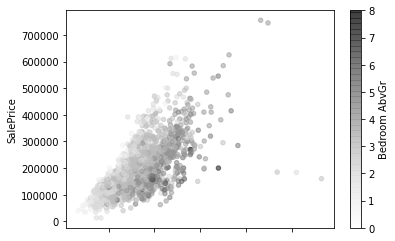

In [ ]:
df_housing.plot.scatter(x="Gr Liv Area", y="SalePrice", 
                        c="Bedroom AbvGr", alpha=.5)

Notice how the colors become darker as you move down the plot. This means that, holding living area constant, a house is less expensive the _more_ bedrooms it has. (Why do you think this is?)

Now, the number of bedrooms is a quantitative variable. What if we wanted to visualize how a categorical variable, such as building type, interacts with these two quantitative variables (living area and sale price)? We have to manually construct the array of colors using the `.map()` function we learned in Chapter 1.

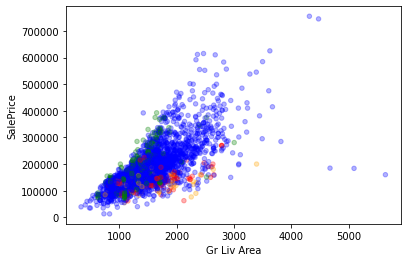

In [ ]:
cols = df_housing["Bldg Type"].map({
    "1Fam": "blue",
    "TwnhsE": "green",
    "Twnhs": "green",
    "Duplex": "red",
    "2fmCon": "orange"
})

df_housing.plot.scatter(x="Gr Liv Area", y="SalePrice", 
                        c=cols, alpha=.3)

## Small Multiples

Rather than try to pack all the variables into a single plot, we can juxtapose several plots or "facets", each showing the data from a slightly different angle. Edward Tufte coined the term "small multiples" for this type of graphic.

For example, rather than use color to represent building type, we could have made 5 separate scatterplots, one for each building type, and arranged them in a row for easy comparison.

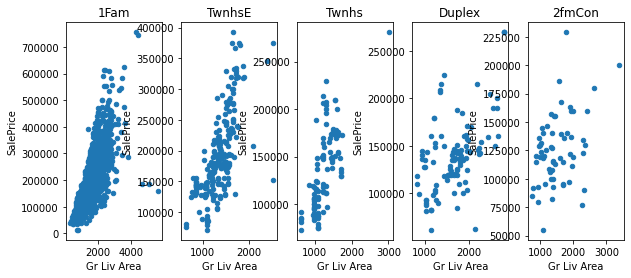

In [ ]:
# Specifies a 1 x 5 grid of plots, figsize in inches
fig, axes = plt.subplots(1, 5, figsize=(10, 4))

bldg_types = df_housing["Bldg Type"].unique()
for ax, bldg_type in zip(axes, bldg_types):
    (df_housing[df_housing["Bldg Type"] == bldg_type].
     plot.scatter(x="Gr Liv Area", y="SalePrice", ax=ax))
    ax.set_title(bldg_type)

Of course, the goal of such a graphic is to facilitate comparison, which is difficult when the $x$- and $y$-axes of the facets are so different. Since the facets are aligned horizontally, it makes sense to use a common $y$-axis for all of them. We can do this by specifying `sharey=True` in `plt.subplots()`. (There is also a corresponding `sharex=` argument.)

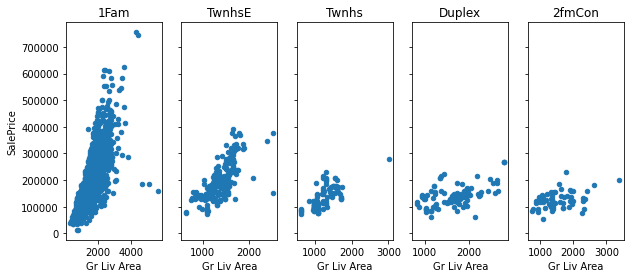

In [ ]:
# Specifies a 1 x 5 grid of plots, figsize in inches
fig, axes = plt.subplots(1, 5, figsize=(10, 4), sharey=True)

bldg_types = df_housing["Bldg Type"].unique()
for ax, bldg_type in zip(axes, bldg_types):
    (df_housing[df_housing["Bldg Type"] == bldg_type].
     plot.scatter(x="Gr Liv Area", y="SalePrice", ax=ax))
    ax.set_title(bldg_type)

Sharing the $y$-axes between the facets also resolved another issue---the colliding $y$-axis labels---since now only the first plot in the figure has an $y$-axis label.

## Grammar of Graphics

The **grammar of graphics** organizes the ideas above into a coherent philosophy. The key insight is that a graphic can be specified by mapping properties of the graphic (e.g., color, size, $x$-axis, column facet) to variables in a data set. Although `pandas` provides some support for this philosophy, the process is tedious, requiring boilerplate code, as we have seen above. For example, in order to use color to represent building type, we had to manually map each building type to a color. Libraries based on the grammar of graphics provide a more friendly interface and hide this complexity from the user.

Software packages that implement the grammar of graphics include `ggplot2` in R and [Altair](https://altair-viz.github.io/) in Python. Since we are working in Python, we will use Altair. The first step is to import the package.

In [ ]:
from altair import *

Now, let's use Altair to recreate the scatterplot from earlier, where each point was colored according to the number of bedrooms.

Every Altair command starts with `Chart(your_data_frame)`, followed by the two main elements of the graphic:
- the mark (i.e., the geometric object being plotted, which for a scatterplot, is a circle)
- the encoding channels (i.e., mappings between properties and variables). For a complete list of supported channels, see [here](https://altair-viz.github.io/user_guide/encoding.html).

In [ ]:
Chart(df_housing).mark_circle().encode(
    x="Gr Liv Area",
    y="SalePrice",
    color="Bedroom AbvGr"
)

Output hidden; open in https://colab.research.google.com to view.

Now, what if we replace the number of bedrooms, a quantitative variable, with building type, a categorical variable?

In [ ]:
Chart(df_housing).mark_circle().encode(
    x="Gr Liv Area",
    y="SalePrice",
    color="Bldg Type"
)

Output hidden; open in https://colab.research.google.com to view.

Notice how Altair automatically inferred that building type was a categorical variable and chose a coloring scheme accordingly. (Compare the color schemes of the two plots above. For quantitative variables, Altair uses a color gradient, while for categorical variables, it uses distinct colors.)

On the other hand, if we had wanted building type to be a column facet (i.e., displaying the different building types using small multiples), we would map the `column` property to building type:

In [ ]:
Chart(df_housing).mark_circle().encode(
    x="Gr Liv Area",
    y="SalePrice",
    column="Bldg Type"
)

Output hidden; open in https://colab.research.google.com to view.

In the examples above, we mapped variables to properties by simply specifying the column names. Although this is convenient, it does not allow the property to be customized any further.

In Altair, every property has an associated Python class. The name of the class is just the name of the property, but with the first letter capitalized. For example, the `x` property is associated with the `X` class and the `color` property with the `Color` class. The first argument of the constructor is always the name of the variable to map to the property, but the additional arguments allow for customization.

For example, suppose we wanted the $x$-axis limits to range from 0 to 4000 and the tick labels on the $y$-axis to display numbers in scientific notation (i.e., 2e+5 instead of 200,000). Here's how we could achieve those customizations in Altair:

In [ ]:
Chart(df_housing).mark_circle().encode(
    x=X("Gr Liv Area", scale=Scale(domain=(0, 4000))),
    y=Y("SalePrice", axis=Axis(format="e")),
    column="Bldg Type"
)

Output hidden; open in https://colab.research.google.com to view.

## Exercises

Exercises 1-2 deal with the Tips data set  (`https://dlsun.github.io/pods/data/tips.csv`).

In [ ]:
tips = pd.read_csv(data_dir + "tips.csv")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


**Exercise 1.** Make a scatterplot (using `pandas`) showing the relationship between the tip and the total bill. Use color to indicate whether the tipper was male or female and the size of each point to represent the party size.

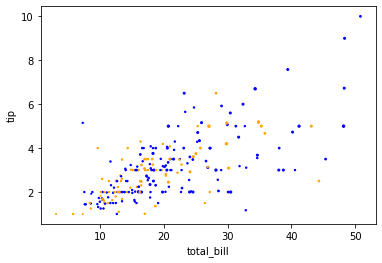

In [ ]:
cols = tips["sex"].map({
    "Male": "blue",
    "Female": "orange"
})
tips.plot.scatter(x="total_bill", y="tip", c=cols, s="size")

**Exercise 2.** Repeat Exercise 1, but using Altair. Can you incorporate even more variables into this figure?

In [ ]:
Chart(tips).mark_circle().encode(
    x="total_bill",
    y="tip",
    color="sex",
    size="size"
)

alt.Chart(...)